In [1]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import sklearn
# featuretools for automated feature engineering
import featuretools as ft

# ignore warnings from pandas
import warnings
warnings.filterwarnings('ignore')

from FeatureSelector import FeatureSelector
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Are you going to die in COVID-19？ (Wensong Qiao)

#  Introduction

COVID-19 has spread in all the world. At the very begining time, COVID-19 was found at Wuhan,China. Only after a month, there is more than 80,000 infected persons in all the world. Therefore, what is the problem we care about most? For me, I just a conmmon people, not politicians, doctors, and officiers. I only care about my questions, that is if I get COVID-19, what's the probability that I will recover? What's the probability I will die? Therefore, I decide to make an predictive model to predict two problems? (1)The first is that given the personal who is already infected, predict if the person will die. (2) predict if the person will recover.  

This is a meaningful problem we need to solve, however, we still need to keep calm and go back to our machine learning methods.

Let's go back to our machine learning, for every machine learning problem, we can use the following process:  

(1) Understand the problem and the data      
(2) Data Acquisition  
(3) Exploratory Data Analysis  
(4) Feature Engineering   
(5) Baseline model       
(6) Improved model    
(7) Conculusion     

Therefore, this time, I prefer to use this process to do this project.

# 1.Understand the problem and the data

Goal: Predict if a infected person will recover or die   
Because it is a classification problem, we will consider the logistic regression, random forest, and XGBoosting. We do not consider neural network here, beacause this is a 'Spreadsheet' dataset, and our dataset is not large engough. 

# 2.Import Data

In [2]:
import os
os.getcwd() #get current work direction.
os.chdir('C:/Users/39377/Documents/GitHub/Walmart_MI_ML_interview_campus/data')

In [93]:
#Load Data
train_line_list = pd.read_csv('COVID19_line_list_data.csv')
train = train_line_list.sample(1085)
train_labels_death = train['death']
train_labels_recovered = train['recovered']
train = train.drop(columns = ['death','recovered'])

In [4]:
train = train.drop(columns =['link'])

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 623 to 333
Data columns (total 24 columns):
id                       1085 non-null int64
case_in_country          888 non-null float64
reporting date           1084 non-null object
Unnamed: 3               0 non-null float64
summary                  1080 non-null object
location                 1085 non-null object
country                  1085 non-null object
gender                   902 non-null object
age                      843 non-null float64
symptom_onset            563 non-null object
If_onset_approximated    560 non-null float64
hosp_visit_date          507 non-null object
exposure_start           128 non-null object
exposure_end             341 non-null object
visiting Wuhan           1085 non-null int64
from Wuhan               1081 non-null float64
symptom                  270 non-null object
source                   1085 non-null object
Unnamed: 21              0 non-null float64
Unnamed: 22              0 no

In [6]:
train.shape

(1085, 24)

In [8]:
train = train.iloc[:,0:19]

In [9]:
train.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,symptom,source,Unnamed: 21
623,624,81.0,2/20/2020,NaN,new confirmed COVID-19 patient in South Korea:...,South Korea,South Korea,female,65.0,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,KCDC,NaN
376,377,141.0,2/25/2020,NaN,new confirmed COVID-19 patient in Japan: Kumam...,Kumamoto City,Japan,male,55.0,2/20/2020,0.0,2/24/2020,NaN,NaN,0,0.0,sore throat,Ministry of Health,NaN
192,193,NaN,1/27/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Shaanxi,China,male,31.0,NaN,NaN,1/21/2020,NaN,1/21/2020,0,1.0,NaN,Health Commission of Shanxi,NaN
609,610,67.0,2/20/2020,NaN,new confirmed COVID-19 patient in South Korea:...,South Korea,South Korea,female,30.0,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,KCDC,NaN
335,336,100.0,2/22/2020,NaN,"new confirmed COVID-19 patient in Japan: male,...",Hokkaido,Japan,male,75.0,2/16/2020,0.0,2/20/2020,NaN,NaN,0,0.0,"fever, cough, malaise",Ministry of Health,NaN


# 3. EDA

## About COVID-19

### the distribution of case in different country

In [52]:
# We want to know the distribution of case in different country
case_in_country = train.groupby('country').count()['case_in_country']
name_list = sorted(train['country'].unique())
x = range(len(case_in_country))

In [54]:
case_in_country

country
Afghanistan      1
Algeria          1
Australia       15
Austria          2
Bahrain         17
Belgium          1
Cambodia         1
Canada          12
China            0
Croatia          1
Egypt            1
Finland          1
France          39
Germany         54
Hong Kong       94
India            3
Iran            18
Israel           1
Italy            3
Japan          190
Kuwait           9
Lebanon          1
Malaysia        23
Nepal            1
Phillipines      3
Russia           2
Singapore       93
South Korea    114
Spain           34
Sri Lanka        1
Sweden           1
Switzerland      1
Taiwan          34
Thailand        41
UAE             21
UK              20
USA             18
Vietnam         16
Name: case_in_country, dtype: int64

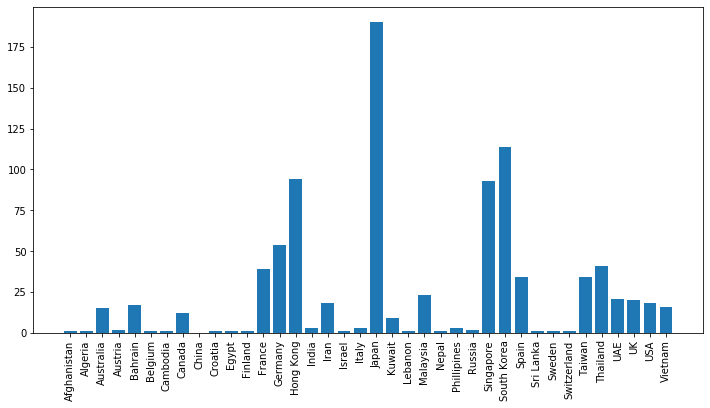

In [56]:
case_in_country = train.groupby('country').count()['case_in_country'].reset_index()
plt.figure(figsize=(12,6))
plt.bar(case_in_country.country, case_in_country.case_in_country)
plt.xticks(rotation=90)
plt.show()

### the distribution of case in different location

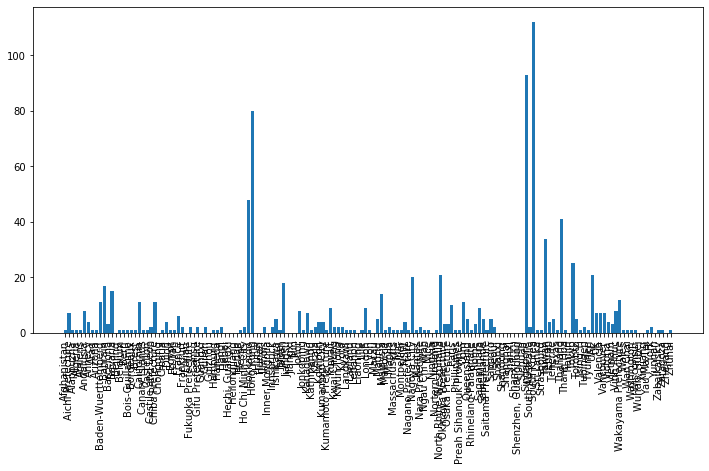

In [59]:
# We want to know the distribution of case in different location
case_in_location = train.groupby('location').count()['case_in_country'].reset_index()
plt.figure(figsize=(12,6))
plt.bar(case_in_location.location, case_in_location.case_in_country)
plt.xticks(rotation=90)
plt.show()

In [61]:
case_in_location

,location,case_in_country
0,Afghanistan,1
1,Aichi Prefecture,7
2,Alappuzha,1
3,Algeria,1
4,Amiens,1
5,Andalusia,8
6,Annecy,4
7,Araq,1
8,Arizona,1
9,Baden-Wuerttemberg,11


### The gender distribution for infection

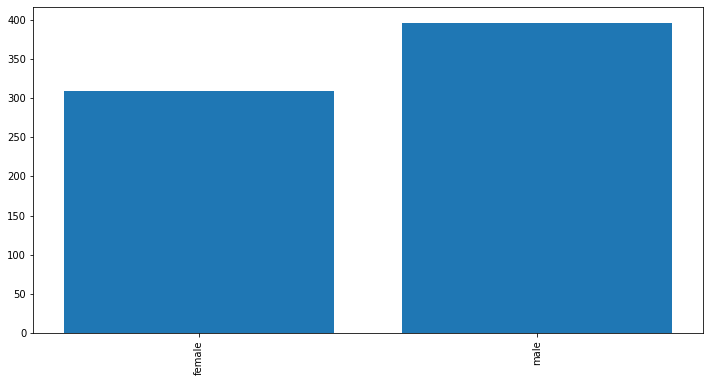

In [64]:
# The gender distribution for infection 
case_in_gender = train.groupby('gender').count()['case_in_country'].reset_index()
plt.figure(figsize=(12,6))
plt.bar(case_in_gender.gender, case_in_gender.case_in_country)
plt.xticks(rotation=90)
plt.show()

In [63]:
case_in_gender

,gender,case_in_country
0,female,309
1,male,396


### The Age distribution for infection

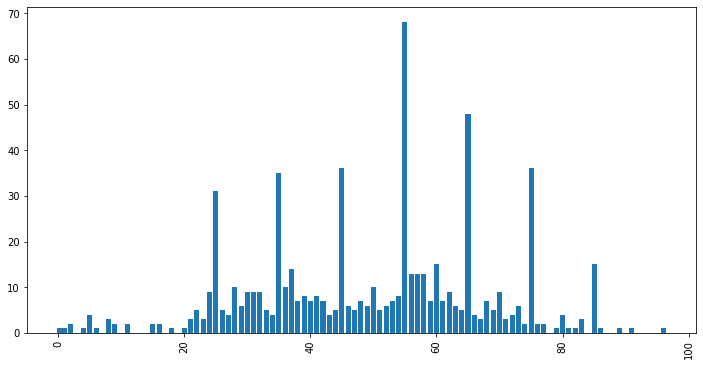

In [67]:
case_in_age = train.groupby('age').count()['case_in_country'].reset_index()
plt.figure(figsize=(12,6))
plt.bar(case_in_age.age, case_in_age.case_in_country)
plt.xticks(rotation=90)
plt.show()

In [66]:
case_in_age

,age,case_in_country
0,0.25,1
1,0.50,1
2,1.00,1
3,2.00,2
4,4.00,1
5,5.00,4
6,6.00,1
7,8.00,3
8,9.00,2
9,11.00,2


## Death And Recovered Information

In [101]:
print('The number of record:',len(train_line_list))
print('The number of death:',sum(train_line_list['death'].astype(float)))
print('The number of recovered:',sum(train_line_list['recovered'].astype(float)))

The number of record: 1085
The number of death: 62.0
The number of recovered: 160.0


In [102]:
1085 - 62 - 160

863

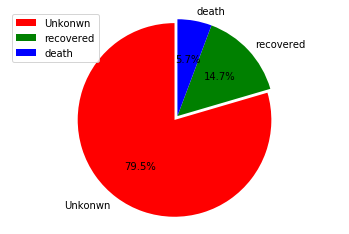

In [103]:
label_list = ["Unkonwn", "recovered", "death"] 
size = [863, 160, 62]   
color = ["red", "green", "blue"]     
explode = [0.05, 0, 0]   
patches, l_text, p_text = plt.pie(size, explode=explode, colors=color, labels=label_list, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
plt.axis("equal")  
plt.legend()
plt.show()

### The Other Information

In [77]:
train['TimeToDiagnostic'] = pd.to_datetime(train['hosp_visit_date']) - pd.to_datetime(train['exposure_start'])
train['exposureTime'] = pd.to_datetime(train['exposure_end']) - pd.to_datetime(train['exposure_start'])
train['ExposureToSymptomc'] = pd.to_datetime(train['symptom_onset']) - pd.to_datetime(train['exposure_start'])

In [78]:
print(train['TimeToDiagnostic'].mean())
print(train['exposureTime'].mean())
print(train['ExposureToSymptomc'].mean())

11 days 21:29:33.134328
5 days 03:08:51.147540
8 days 04:20:14.457831


## About Machine Learning

### (1).Missing Value

In [22]:
# Create an empty function
fs = FeatureSelector()

4 features with greater than 0.60 missing values.



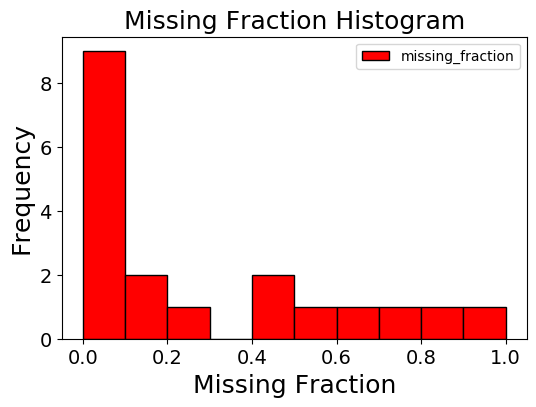

In [23]:
fs.identify_missing(train, 0.6)
fs.plot_missing()

### (2).Single Unique Value Features

0 features with a single unique value.



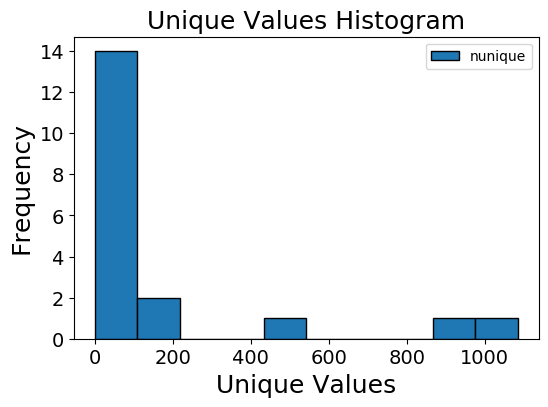

In [24]:
fs.identify_single_unique(train)
fs.plot_unique()

### (3).Collinear Features

In [30]:
fs.identify_collinear(train, 0.99)

0 features with a correlation greater than 0.99.



### (4).Check the class balance

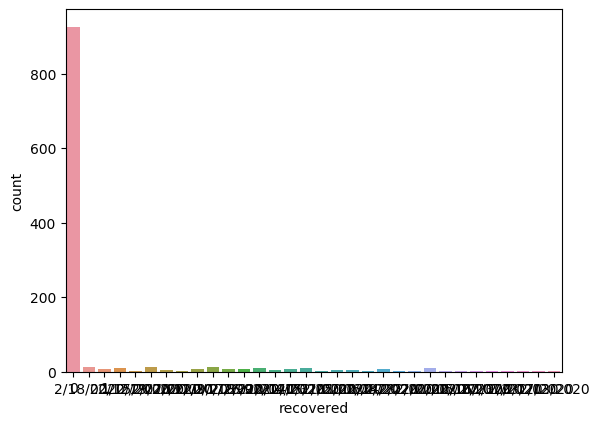

In [28]:
# Check if the data is balanced 
train_labels_recovered.value_counts()
sns.countplot(train_labels_recovered)

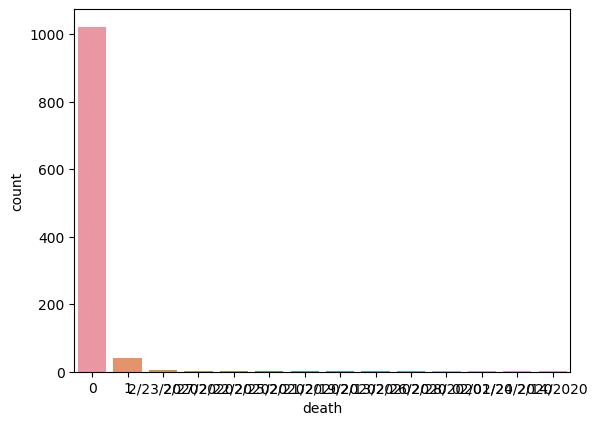

In [29]:
train_labels_recovered.value_counts()
sns.countplot(train_labels_death)

# 4.Feature Engineering

## (1)Add Features

Usually,in feature engineering, we need to create more new and efficient features.There are two ways, one is aggregation and another is transformation.Because I have limited domain knowledge of medical science, I woulf like to get as much information as possible, and then to select the efficient futures.

In [31]:
# bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
train.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,symptom,source,link
977,978,9.0,02/12/20,NaN,"new confirmed COVID-19 patient in London, UK: ...",London,UK,female,NaN,NaN,NaN,NaN,1/24/2020,1/28/2020,0,0.0,NaN,BBC,https://www.bbc.com/news/uk-51481475
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
38,39,NaN,1/22/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,female,33.0,NaN,NaN,1/20/2020,NaN,1/18/2020,0,1.0,NaN,央视新闻,https://m.weibo.cn/status/4463681624289721?
896,897,27.0,02/09/20,NaN,new confirmed COVID-19 patient in Hong Kong: 2...,Wan Chai,Hong Kong,male,24.0,1/30/2020,0.0,1/30/2020,NaN,NaN,0,0.0,"fever, cough",Government HK,https://www.info.gov.hk/gia/general/202002/09/...
416,417,181.0,2/27/2020,NaN,new confirmed COVID-19 patient in Japan: Hokka...,Hokkaido,Japan,male,5.0,2/21/2020,0.0,2/24/2020,NaN,NaN,0,0.0,"fever, cough",Ministry of Health,https://www.mhlw.go.jp/stf/houdou/houdou_list_...


In [38]:
train['TimeToDiagnostic'] = pd.to_datetime(train['hosp_visit_date']) - pd.to_datetime(train['exposure_start'])
train['exposureTime'] = pd.to_datetime(train['exposure_end']) - pd.to_datetime(train['exposure_start'])
train['ExposureToSymptomc'] = pd.to_datetime(train['exposure_start']) - pd.to_datetime(train['exposure_start'])

In [51]:
train

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,symptom,source,TimeToDiagnostic,exposureTime,ExposureToSymptomc
977,978,9.0,02/12/20,NaN,"new confirmed COVID-19 patient in London, UK: ...",London,UK,female,NaN,NaN,...,NaN,1/24/2020,1/28/2020,0,0.0,NaN,BBC,NaT,4 days,0 days
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,1/17/2020,NaN,01/03/20,0,1.0,NaN,Health Commission of Zhejiang Province,NaT,NaT,NaT
38,39,NaN,1/22/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,female,33.0,NaN,...,1/20/2020,NaN,1/18/2020,0,1.0,NaN,央视新闻,NaT,NaT,NaT
896,897,27.0,02/09/20,NaN,new confirmed COVID-19 patient in Hong Kong: 2...,Wan Chai,Hong Kong,male,24.0,1/30/2020,...,1/30/2020,NaN,NaN,0,0.0,"fever, cough",Government HK,NaT,NaT,NaT
416,417,181.0,2/27/2020,NaN,new confirmed COVID-19 patient in Japan: Hokka...,Hokkaido,Japan,male,5.0,2/21/2020,...,2/24/2020,NaN,NaN,0,0.0,"fever, cough",Ministry of Health,NaT,NaT,NaT
127,128,NaN,1/25/2020,NaN,confirmed imported COVID-19 pneumonia patient ...,Gansu,China,female,33.0,1/18/2020,...,1/23/2020,NaN,1/18/2020,1,0.0,NaN,央视新闻,NaT,NaT,NaT
68,69,NaN,1/22/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Hunan,China,female,66.0,1/17/2020,...,1/21/2020,NaN,NaN,1,0.0,NaN,央视新闻,NaT,NaT,NaT
21,22,NaN,1/22/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Guizhou,China,male,51.0,1/14/2020,...,1/14/2020,NaN,NaN,0,1.0,NaN,人民日报,NaT,NaT,NaT
436,437,11.0,02/05/20,NaN,new confirmed COVID-19 patient in Malaysia: ma...,Malaysia,Malaysia,male,45.0,NaN,...,NaN,NaN,02/04/20,1,0.0,NaN,Straits Times,NaT,NaT,NaT
642,643,100.0,2/20/2020,NaN,new confirmed COVID-19 patient in South Korea:,South Korea,South Korea,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0.0,NaN,KCDC,NaT,NaT,NaT


## (2) Create dummy variables

In [52]:
cat_vars=['summary','location','country','symptom_onset','hosp_visit_date','exposure_start','exposure_end','source']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(train[var], prefix=var)
    train_copy=pd.concat([train,cat_list],axis = 1)
    
cat_vars=['summary','location','country','symptom_onset','hosp_visit_date','exposure_start','exposure_end','source']
data_vars=train.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
train_copy = train_copy.drop(cat_vars, axis=1)

## (3)Feature Selection

Usually, we do not want to use all the features. That is becuase unnecessary features decrease training speed, decrease model interpretability, and decrease generalization performance on the test set.

### I.Missing Value

In [55]:
fs.identify_missing(train_copy, 0.6)

5 features with greater than 0.60 missing values.



### II.Single Unique Value Features

A feature with only one unique value cannot be useful for machine learning because this feature has zero variance.

In [56]:
fs.identify_single_unique(train_copy)

1 features with a single unique value.



### III.Collinear Features

Collinear Features lead to decreased generalization performance on the test set due to high variance and less model interpretability.

In [57]:
fs.identify_collinear(train_copy, 0.99)

0 features with a correlation greater than 0.99.



### IV.Removing Features

In [66]:
features_identified = fs.check_identified()

3 features identified for removal


In [67]:
train_removed = fs.remove(train_copy, methods = 'all')

['missing', 'single_unique', 'collinear'] methods have been run
Removed 3 features


In [68]:
train_removed.to_csv('train_removed.csv')

In [69]:
train_copy = train_removed

## (4)Handling Missing Data

In [70]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [ ]:
imputer = imputer.fit(train_copy)
train_copy = imputer.transform(train_copy)

In [63]:
train_copy[0]

array([ 3.93583000e+05,  1.44000000e+05,  3.01500000e+05,  1.55250000e+04,
        8.47400000e-03, -1.40880000e+04, -2.54000000e+03, -3.14300000e+03,
       -4.81300000e+03,  1.40000000e+01,  0.00000000e+00,  4.00000000e+00,
        1.50000000e+01,  6.35473732e-01,  2.07964174e-01,  7.11000000e-02,
        1.20800000e-01,  9.60800000e-01,  7.55200000e-01,  0.00000000e+00,
        0.00000000e+00,  2.41400000e-01,  1.25000000e-01,  1.66700000e-01,
        0.00000000e+00,  8.58000000e-02,  4.10000000e-03,  0.00000000e+00,
        4.30000000e-03,  7.69000000e-02,  2.00000000e+00, -1.66600000e+03,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00])

## (5) Scaling

In [50]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
train_copy_minmax = min_max_scaler.fit_transform(train_copy)

In [51]:
train_copy_minmax[0]

array([0.82408702, 0.05263158, 0.09661017, 0.09618975, 0.10529551,
       0.63481092, 0.036665  , 0.83947086, 0.22458515, 0.21538462,
       0.        , 0.27272727, 0.65217391, 0.77741165, 0.23217548,
       0.0711    , 0.1208    , 0.9608    , 0.7552    , 0.        ,
       0.        , 0.2414    , 0.125     , 0.1667    , 0.        ,
       0.0858    , 0.0041    , 0.        , 0.00436992, 0.0769    ,
       0.08695652, 0.59066339, 1.        , 0.        , 0.        ])

## (6) Over-sampling using SMOTE

In [94]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(train_copy_minmax, train_labels, test_size=0.3, random_state=0)
columns = train_removed.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(os_data_y)
X_test = pd.DataFrame(data=X_test,columns=columns )
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['TARGET']==0]))
print("Number of subscription",len(os_data_y[os_data_y['TARGET']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['TARGET']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['TARGET']==1])/len(os_data_X))

length of oversampled data is  12934
Number of no subscription in oversampled data 6467
Number of subscription 6467
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


# (5)Baseline model

### Logistic

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(os_data_X, os_data_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [300]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [301]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, y_pred)
print(res)

[[1910  854]
 [  83  153]]


In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80      2764
           1       0.15      0.65      0.25       236

    accuracy                           0.69      3000
   macro avg       0.56      0.67      0.52      3000
weighted avg       0.89      0.69      0.76      3000



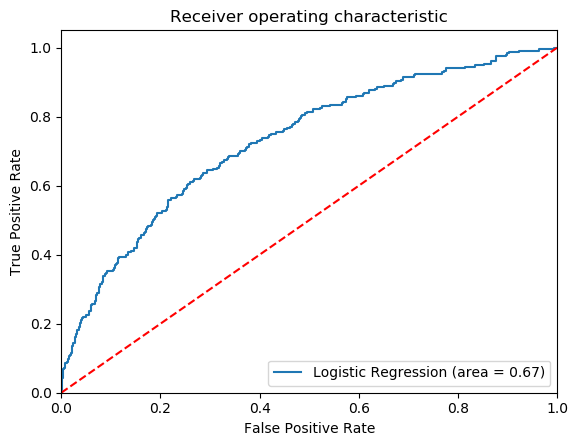

In [207]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest

In [302]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
random_forest.fit(os_data_X, os_data_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [303]:
y_pred = random_forest.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(random_forest.score(X_test, y_test)))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy of random forest classifier on test set: 0.91


In [308]:
res = confusion_matrix(y_test, pd.DataFrame(y_pred))
print(res)

[[2719   45]
 [ 223   13]]


In [309]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2764
           1       0.22      0.06      0.09       236

    accuracy                           0.91      3000
   macro avg       0.57      0.52      0.52      3000
weighted avg       0.87      0.91      0.89      3000



[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


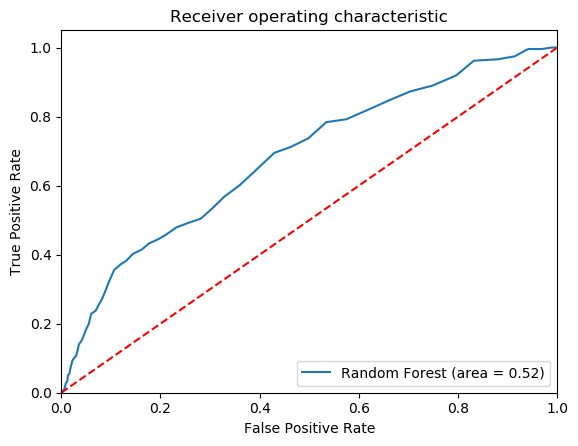

In [111]:
random_forest_roc_auc = roc_auc_score(y_test, random_forest.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % random_forest_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# (6)Improved Model

In [264]:
import xgboost as xgb

In [228]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=5, shuffle=True, random_state=2019)

In [265]:
##训练部分
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=100, learning_rate=0.05, subsample=0.5)
xgb_model.fit(os_data_X, os_data_y)
##预测部分
pred = xgb_model.predict(X_test)

In [269]:
print('Accuracy of XGBoosting classifier on test set: {:.2f}'.format(xgb_model.score(X_test, y_test)))

Accuracy of XGBoosting classifier on test set: 0.92


In [305]:
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_xgb)

[[2726   38]
 [ 225   11]]


In [306]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2764
           1       0.22      0.06      0.09       236

    accuracy                           0.91      3000
   macro avg       0.57      0.52      0.52      3000
weighted avg       0.87      0.91      0.89      3000



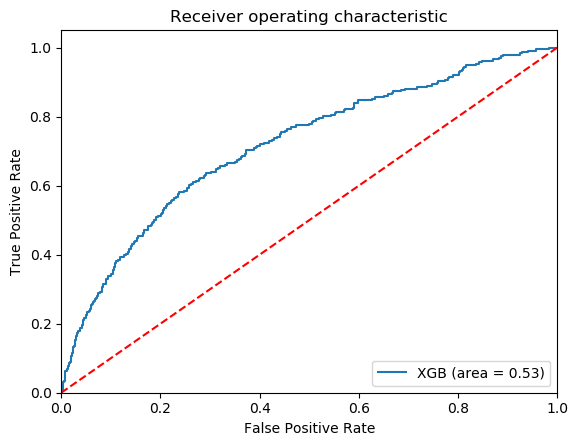

In [307]:
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,xgb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGB (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [253]:
# k-fold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(xgb, os_data_X, os_data_y, cv=kfold)

In [254]:
print(results)

[0.92735703 0.94049459 0.93276662 0.94204019 0.93812838 0.96519722
 0.99767981 0.99767981 0.99613302 0.9992266 ]


In [ ]:
test_results = cross_val_score(xgb, os_data_X, os_data_y, cv=kfold)

In [ ]:
# Hyperparameter tuning
from sklearn.grid_search import GridSearchCV   

In [ ]:
# save model to file
pickle.dump(model, open("pima.pickle.dat", "wb"))